# Ejercicio Final de Regresión: Predicción de Costes de Seguro Médico

## Objetivo
Aplicar los conocimientos obtenidos en regresión para predecir los costes del seguro médico utilizando diferentes técnicas de machine learning.

**Variable objetivo (Target):** `charges` - Coste del seguro médico

## Descripción del Dataset
El dataset `insurance.csv` contiene información sobre seguros médicos con las siguientes variables:
- **age**: Edad del beneficiario
- **sex**: Sexo del beneficiario (male/female)
- **bmi**: Índice de masa corporal
- **children**: Número de hijos cubiertos por el seguro
- **smoker**: Si el beneficiario es fumador (yes/no)
- **region**: Región de residencia en EE.UU.
- **charges**: Costes médicos individuales facturados por el seguro de salud (variable objetivo)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor


## 1. Importación de Librerías

Importamos todas las librerías necesarias para el análisis de datos, visualización y modelado:

In [2]:
dataset = pd.read_csv("../data/insurance.csv")

## 2. Carga de Datos

Cargamos el dataset de seguros médicos desde el archivo CSV:

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2.1 Exploración Inicial de los Datos

Examinamos las primeras filas del dataset para entender su estructura:

## 3. Análisis Exploratorio de Datos (EDA)

En esta sección realizamos un análisis exploratorio completo para entender mejor nuestros datos:

In [4]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 3.1 Verificación de Valores Faltantes

Comprobamos si existen valores nulos en el dataset:

In [5]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 3.2 Estadísticas Descriptivas

Analizamos las estadísticas descriptivas de las variables numéricas:

In [6]:
dataset = pd.get_dummies(dataset, drop_first = True)

### 3.3 Codificación de Variables Categóricas

Convertimos las variables categóricas en variables dummy para poder usarlas en los modelos de machine learning.

El parámetro `drop_first=True` evita la multicolinealidad al eliminar una categoría de referencia:

<Axes: >

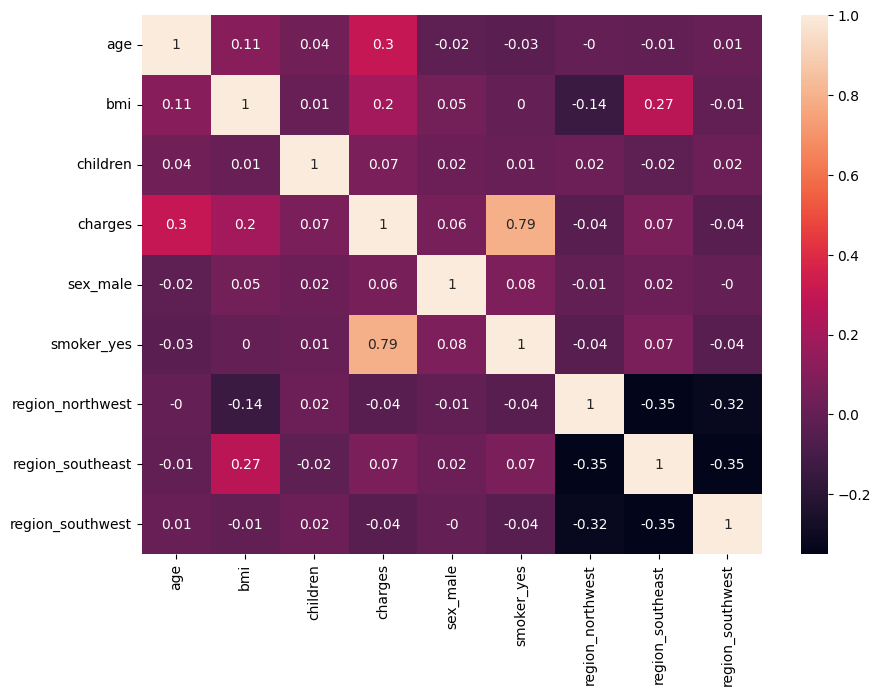

In [7]:
correlation_matrix = dataset.corr().round(2)
plt.figure(figsize=(10, 7))
sns.heatmap(data=correlation_matrix, annot=True)

### 3.4 Análisis de Correlaciones

Generamos una matriz de correlación para identificar las relaciones entre variables:

In [8]:
data = pd.get_dummies(dataset, drop_first=True)
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


<Axes: >

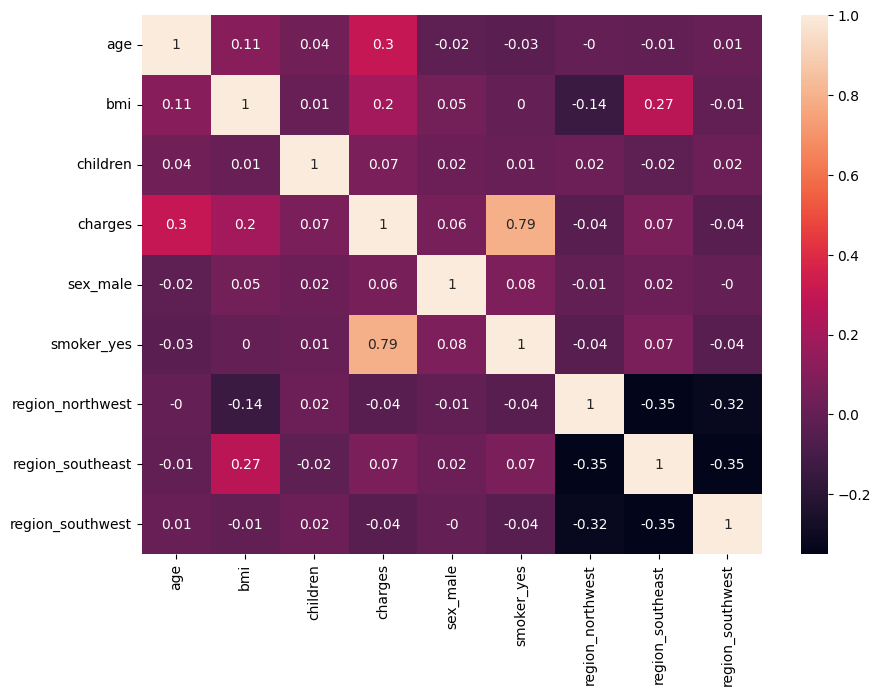

In [9]:
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(10, 7))
sns.heatmap(data=correlation_matrix, annot=True)

## 4. Primer Modelo: Regresión Lineal Múltiple Simple

### 4.1 Selección de Variables Inicial

Probamos una regresión lineal múltiple con las variables que muestran mayor correlación con la variable objetivo:
- `smoker_yes`: Variable que indica si la persona es fumadora
- `age`: Edad de la persona

**Hipótesis:** Estas dos variables deberían ser buenos predictores del coste del seguro.

In [10]:
X = data[['smoker_yes', 'age']]
y = data['charges']

#### Definición de Variables X e y

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 2)
(268, 2)
(1070,)
(268,)


#### División del Dataset

Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%):

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#### Estandarización de Variables

Aplicamos estandarización para normalizar las escalas de las variables:

In [13]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Entrenamiento del Modelo

Creamos y entrenamos el modelo de regresión lineal:

In [14]:
from math import sqrt

# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = sqrt(mean_squared_error(Y_test, y_test_predict))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6458.5760461588525
R2 score is 0.7123837690275729


The model performance for testing set
--------------------------------------
RMSE is 6112.830212938709
R2 score is 0.7538244376016501


### 4.2 Evaluación del Modelo

Evaluamos el rendimiento del modelo usando métricas estándar:
- **RMSE (Root Mean Square Error):** Mide el error promedio en las mismas unidades que la variable objetivo
- **R² (Coeficiente de Determinación):** Indica qué porcentaje de la varianza es explicada por el modelo

## 5. Segundo Modelo: Regresión Lineal con Selección de Variables

### 5.1 Método de Selección Automática de Variables

Ahora probamos una regresión lineal múltiple utilizando un método automático de selección de variables para encontrar la mejor combinación que maximice el R².

In [15]:
dataset = pd.read_csv("../data/insurance.csv")

#### Recarga y Preparación de Datos

El parámetro __drop_first__=True en pd.get_dummies() sirve para evitar la multicolinealidad perfecta al crear variables dummy (variables categóricas codificadas como binarias).

__¿Por qué es importante?__

* Evita multicolinealidad perfecta: Si mantienes todas las columnas dummy, una es completamente predecible por las otras (suma siempre 1).

* Mejor para modelos de regresión: Los algoritmos como regresión lineal pueden tener problemas con matrices singulares cuando hay multicolinealidad perfecta.

* Ahorra memoria y reduce dimensionalidad: Una columna menos sin pérdida de información

In [16]:
data = pd.get_dummies(dataset, drop_first=True)

In [17]:
X = data.drop("charges", axis = 1)
y = data['charges']

#### Preparación de Variables para Selección Automática

Utilizamos todas las variables disponibles como candidatas para la selección:

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 8)
(268, 8)
(1070,)
(268,)


In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [20]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#### Importación de la Librería de Selección de Variables

Usamos `SequentialFeatureSelector` para realizar selección automática de variables:

In [22]:
dataset_seleccion = pd.DataFrame()
for i in range(1, len(X_train_df.columns)):
    sbs = SFS(LinearRegression(),k_features=i,forward=False,floating=False)
    sbs.fit(np.array(X_train), Y_train)
    sbs.k_feature_names_
    regression = LinearRegression()
    regression.fit(X_train_df[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]], Y_train)
    y_pred = regression.predict(X_test_df[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]])
    r2 = r2_score(y_pred = y_pred, y_true = Y_test)
    
    dataset_seleccion = pd.concat([dataset_seleccion,pd.DataFrame({"variables":[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]],"r2": r2})],ignore_index = True)


### 5.2 Proceso de Selección de Variables

Este proceso evalúa diferentes combinaciones de variables utilizando selección hacia atrás (backward selection) y calcula el R² para cada combinación:

In [23]:
dataset_seleccion.sort_values(by = "r2", ascending = False, ignore_index = True)

,variables,r2
0,"[age, bmi, smoker_yes]",0.779345
1,"[age, bmi, children, smoker_yes, region_southe...",0.778703
2,"[age, bmi, children, sex_male, smoker_yes, reg...",0.778290
3,"[age, bmi, children, smoker_yes]",0.778259
4,"[age, bmi, children, smoker_yes, region_southw...",0.778065
5,"[age, smoker_yes]",0.753824
6,[smoker_yes],0.653637


### 5.3 Resultados de la Selección

Ordenamos los resultados por R² para identificar la mejor combinación de variables:

In [24]:
X = data[dataset_seleccion.sort_values(by = "r2", ascending = False, ignore_index = True)["variables"][0]]

### 5.4 Entrenamiento con Variables Seleccionadas

Utilizamos la mejor combinación de variables identificada en el proceso de selección:

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 3)
(268, 3)
(1070,)
(268,)


In [26]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [27]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
from math import sqrt
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = sqrt(mean_squared_error(Y_test, y_test_predict))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6156.387239183524
R2 score is 0.7386685402148381


The model performance for testing set
--------------------------------------
RMSE is 5787.308013638787
R2 score is 0.7793451556442221


## 6. Tercer Modelo: Árbol de Decisión con GridSearch

### 6.1 Optimización de Hiperparámetros

Probamos un modelo de árbol de decisión utilizando `GridSearchCV` para encontrar los mejores hiperparámetros.

**Ventajas de los árboles de decisión:**
- Pueden capturar relaciones no lineales
- No requieren estandarización de variables
- Son interpretables
- Manejan automáticamente interacciones entre variables

In [29]:
dataset = pd.read_csv("../data/insurance.csv")

In [30]:
data = pd.get_dummies(dataset, drop_first=True)

In [31]:
X = data.drop("charges", axis = 1)
y = data['charges']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 8)
(268, 8)
(1070,)
(268,)


In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [34]:
#Probamos dándole un mínimo de muestras para que pueda haber una división.
regressor = DecisionTreeRegressor(random_state = 0)

#### Configuración del Modelo Base

Creamos un árbol de decisión base que será optimizado por GridSearch:

In [35]:
parameters = {'min_samples_split': [2, 10, 20, 40, 60, 80, 100],
                  'min_samples_leaf': [3, 5, 10, 15, 20, 25, 30],
                  'max_depth': [4, 6, 8, 10, 15, 20, 25]
                 }

#### Definición de Hiperparámetros a Optimizar

Configuramos el espacio de búsqueda para los hiperparámetros:
- **min_samples_split:** Número mínimo de muestras requeridas para dividir un nodo
- **min_samples_leaf:** Número mínimo de muestras requeridas en una hoja
- **max_depth:** Profundidad máxima del árbol

In [36]:
from sklearn.model_selection import GridSearchCV
grid_tree = GridSearchCV(estimator=regressor, param_grid = parameters)

#### Configuración de GridSearchCV

Configuramos la búsqueda en rejilla para encontrar los mejores hiperparámetros:

In [37]:
grid_tree.fit(X_train, Y_train)

,estimator,DecisionTreeR...andom_state=0)
,param_grid,"{'max_depth': [4, 6, ...], 'min_samples_leaf': [3, 5, ...], 'min_samples_split': [2, 10, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


#### Entrenamiento y Optimización

Ejecutamos la búsqueda de hiperparámetros óptimos:

In [38]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_tree.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_tree.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_tree.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=4, min_samples_leaf=20, random_state=0)

 The best score across ALL searched params:
 0.8408881888121915

 The best parameters across ALL searched params:
 {'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 2}


### 6.2 Resultados de la Optimización

Mostramos los mejores hiperparámetros encontrados por GridSearch:

In [39]:
from math import sqrt
# model evaluation for training set

y_train_predict = grid_tree.best_estimator_.predict(X_train)
rmse = sqrt(mean_squared_error(Y_train, y_train_predict))
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = grid_tree.best_estimator_.predict(X_test)
# root mean square error of the model
rmse = sqrt(mean_squared_error(Y_test, y_test_predict))
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)


print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4525.725600958096
MSE is 20482192.215167522
R2 score is 0.8587734749373447


The model performance for testing set
--------------------------------------
RMSE is 10279.765598446267
MSE is 105673580.75899933
R2 score is 0.30381173880568957


/Users/davidreyblanco/Software/training/mbit/regression/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### 6.3 Evaluación del Árbol Optimizado

Evaluamos el rendimiento del árbol de decisión con los mejores hiperparámetros encontrados:

## 7. Cuarto Modelo: Árbol de Decisión con Variables Seleccionadas

### 7.1 Combinando Selección de Variables y Optimización de Hiperparámetros

En este experimento final, combinamos las mejores prácticas:
- Utilizamos solo las variables más relevantes (age, bmi, smoker_yes)
- Aplicamos optimización de hiperparámetros con GridSearch
- **Nota:** No aplicamos estandarización ya que los árboles de decisión no la requieren

In [40]:
dataset = pd.read_csv("../data/insurance.csv")

In [41]:
data = pd.get_dummies(dataset, drop_first=True)

In [42]:
X = data[["age", "bmi", "smoker_yes"]]
y = data['charges']

#### Selección de Variables Específicas

Utilizamos las tres variables más importantes identificadas en análisis previos:

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 3)
(268, 3)
(1070,)
(268,)


In [44]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train_scaled = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

In [45]:
#Probamos dándole un mínimo de muestras para que pueda haber una división.
regressor = DecisionTreeRegressor(random_state = 0)

In [46]:
parameters = {'min_samples_split': [2, 10, 20, 40, 60, 80, 100],
                  'min_samples_leaf': [3, 5, 10, 15, 20, 25, 30],
                  'max_depth': [4, 6, 8, 10, 15, 20, 25]
                 }

In [47]:
from sklearn.model_selection import GridSearchCV
grid_tree = GridSearchCV(estimator=regressor, param_grid = parameters)

In [48]:
grid_tree.fit(X_train, Y_train)

,estimator,DecisionTreeR...andom_state=0)
,param_grid,"{'max_depth': [4, 6, ...], 'min_samples_leaf': [3, 5, ...], 'min_samples_split': [2, 10, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [49]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_tree.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_tree.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_tree.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=4, min_samples_leaf=20, random_state=0)

 The best score across ALL searched params:
 0.8407158226060811

 The best parameters across ALL searched params:
 {'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [50]:
# model evaluation for training set

y_train_predict = grid_tree.best_estimator_.predict(X_train)
rmse = sqrt(mean_squared_error(Y_train, y_train_predict))
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = grid_tree.best_estimator_.predict(X_test)
# root mean square error of the model
rmse = sqrt(mean_squared_error(Y_test, y_test_predict))
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)


print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4565.3149864039
MSE is 20842100.925084036
R2 score is 0.8562918725821216


The model performance for testing set
--------------------------------------
RMSE is 4088.214010025706
MSE is 16713493.791770466
R2 score is 0.8898898088074519


### 7.2 Evaluación Final

Evaluamos el rendimiento del modelo final que combina selección de variables y optimización de hiperparámetros:

### Resumen de Resultados

En este notebook hemos implementado y comparado cuatro enfoques diferentes para predecir los costes del seguro médico:

1. **Regresión Lineal Simple:** Con variables smoker_yes y age
2. **Regresión Lineal con Selección Automática:** Utilizando todas las variables disponibles
3. **Árbol de Decisión Optimizado:** Con GridSearch en todas las variables
4. **Árbol de Decisión Optimizado con Variables Seleccionadas:** Combinando lo mejor de ambos enfoques

### Métricas de Evaluación

- **RMSE (Root Mean Square Error):** Cuanto menor sea, mejor es el modelo
- **R² (Coeficiente de Determinación):** Cuanto más cercano a 1, mejor explica la varianza
- **MSE (Mean Square Error):** Error cuadrático medio

### Lecciones Aprendidas

1. **Importancia de la Selección de Variables:** La variable `smoker_yes` es el predictor más fuerte
2. **Optimización de Hiperparámetros:** GridSearch mejora significativamente el rendimiento
3. **Comparación de Algoritmos:** Los árboles de decisión pueden capturar relaciones no lineales
4. **Preprocesamiento:** La estandarización es crucial para regresión lineal pero no para árboles

### Recomendaciones

- Para este dataset específico, el modelo que mejor balance presenta entre interpretabilidad y rendimiento es el árbol de decisión optimizado
- La variable "smoker" es el factor más determinante en los costes del seguro
- Es importante considerar tanto el rendimiento en entrenamiento como en prueba para evitar sobreajuste